In [40]:
import pandas as pd
import sklearn
from sklearn import svm
from sklearn import datasets
import numpy  as np
from sklearn import linear_model
from sklearn.utils import shuffle
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure

### load the data

In [41]:
url='/Users/mustafaaldabbas/Documents/GitHub/Machine_learning_cancer/Dataset/supermarket_sales - Sheet1 2.csv'
df=pd.read_csv(url)
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Understanding the Data

* Invoice id: Unique identifier for each transaction
* Branch: Identifies the branch (A, B, C)
* City: Location of the branches
* Customer type: Member or Normal
* Gender: Gender of the customer
* Product line: Category of the product
* Unit price: Price per unit of the product
* Quantity: Number of units purchased
* Tax: 5% tax on the total price
* Total: Total price including tax
* Date: Date of purchase
* Time: Time of purchase
* Payment: Payment method used
* COGS: Cost of goods sold
* Gross margin percentage: Gross margin percentage
* Gross income: Gross income
* Rating: Customer rating

In [42]:
df.info(), 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

(None,)

In [43]:
df.shape, 

((1000, 17),)

In [44]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


### clean the data

In [45]:

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for duplicates
df = df.drop_duplicates()
df=df.dropna()


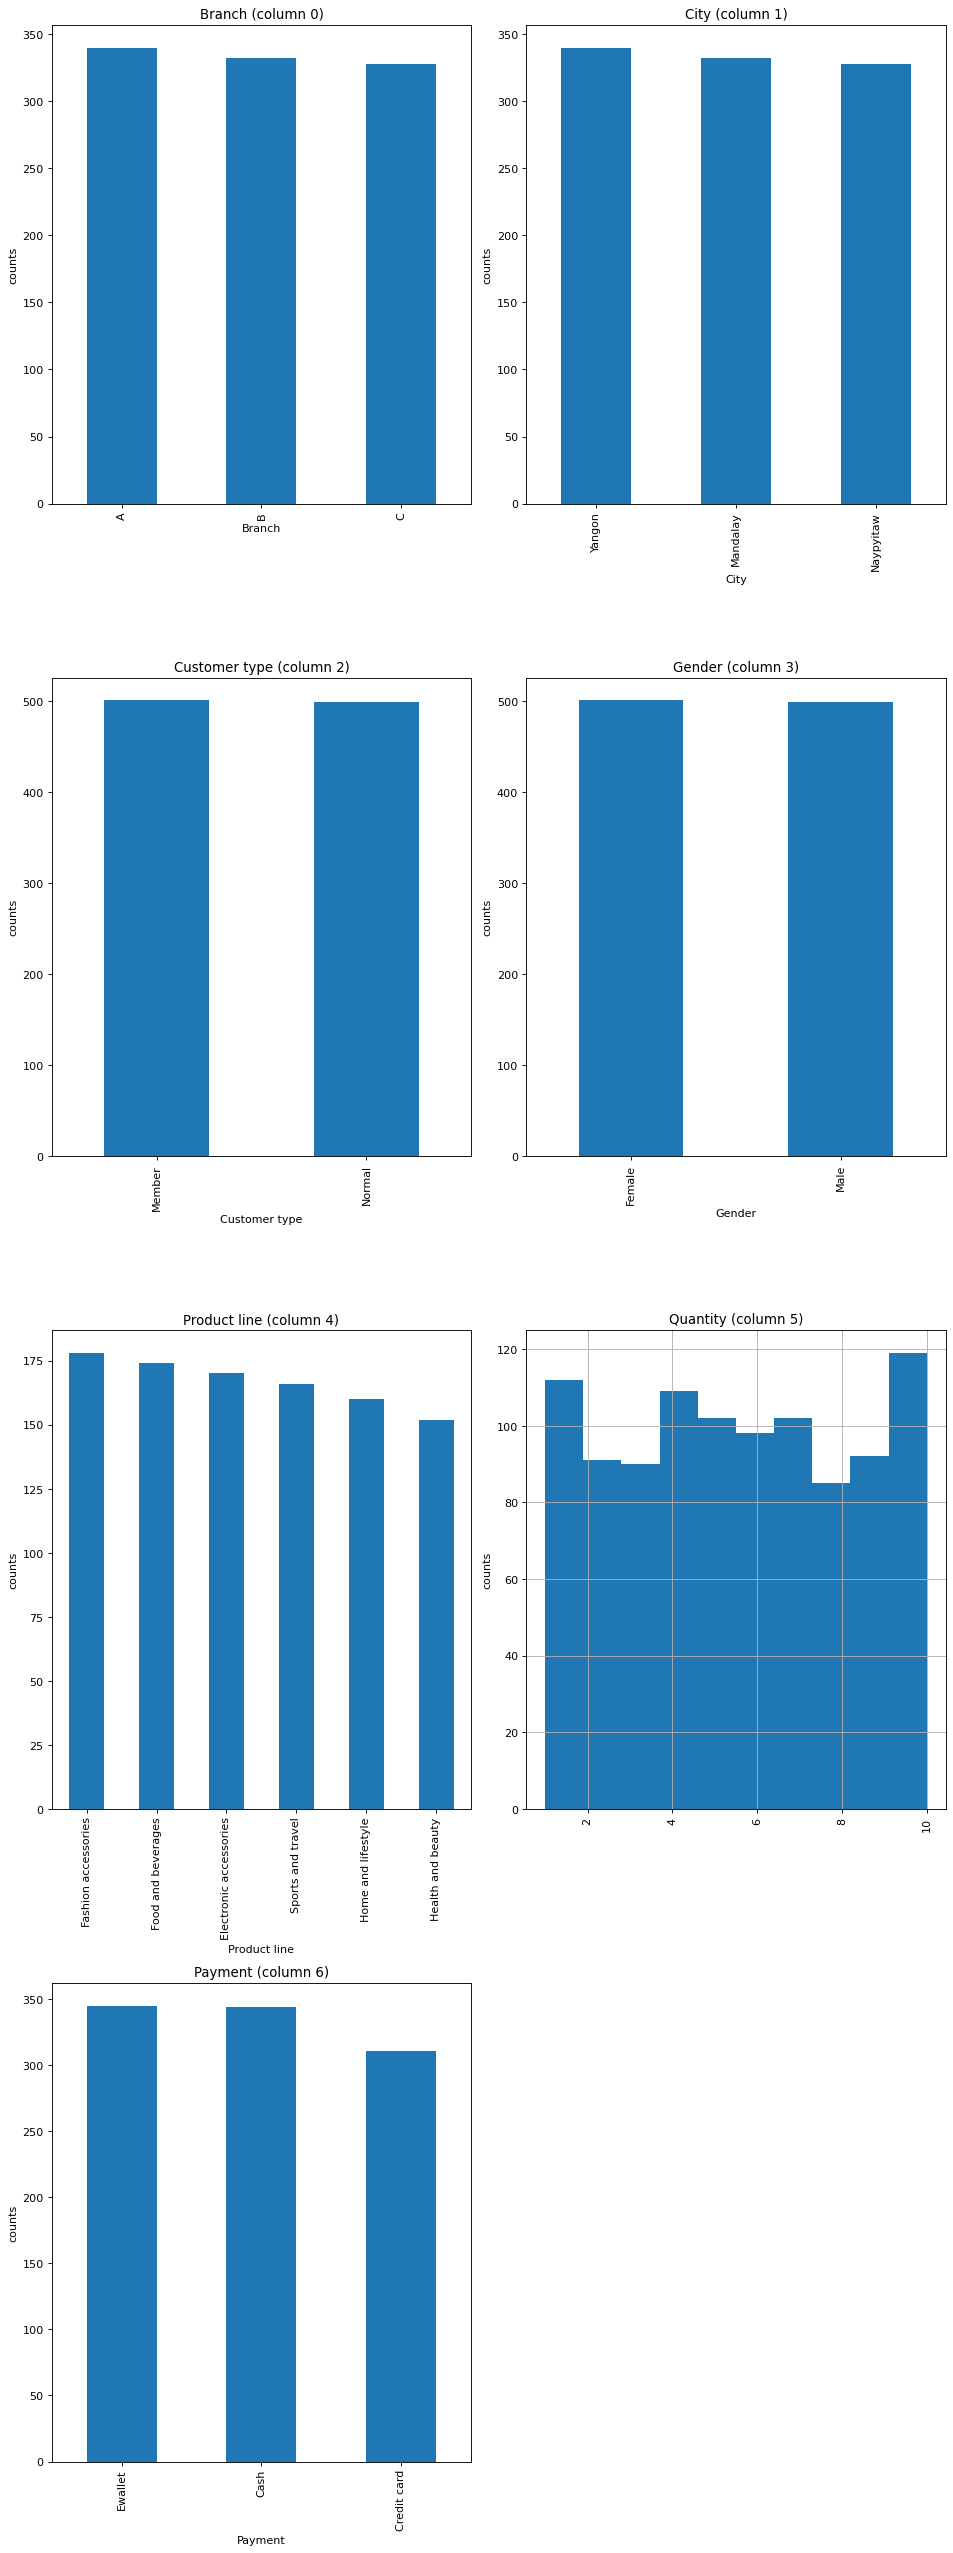

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Define the function to plot distribution graphs
def plot_per_column_distribution(df, n_graph_shown, n_graph_per_row):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]  # For displaying purposes, pick columns that have between 1 and 50 unique values
    n_row, n_col = df.shape
    column_names = list(df)
    n_graph_row = (n_col + n_graph_per_row - 1) // n_graph_per_row  # Use integer division
    plt.figure(num=None, figsize=(6 * n_graph_per_row, 8 * n_graph_row), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(n_col, n_graph_shown)):
        plt.subplot(n_graph_row, n_graph_per_row, i + 1)
        column_df = df.iloc[:, i]
        if not np.issubdtype(type(column_df.iloc[0]), np.number):
            value_counts = column_df.value_counts()
            value_counts.plot.bar()
        else:
            column_df.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{column_names[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

# Define the number of graphs to show and the number of graphs per row
n_graph_shown = 10  # For example, show 10 graphs
n_graph_per_row = 2  # For example, 2 graphs per row

# Call the function
plot_per_column_distribution(df, n_graph_shown, n_graph_per_row)


### correlation matrix 

In [51]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
 
  
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
graphWidth=15
plotCorrelationMatrix(df, graphWidth)

ValueError: could not convert string to float: '750-67-8428'